Yeh wala sirf Indian Express pe hi kaam karega \\
The flow of html of all the articles present on www.indianexpress.com is given in the image \\
There are two "***div class=row***" \\
1) Has the header of the article \\
2) Has the full content of the article















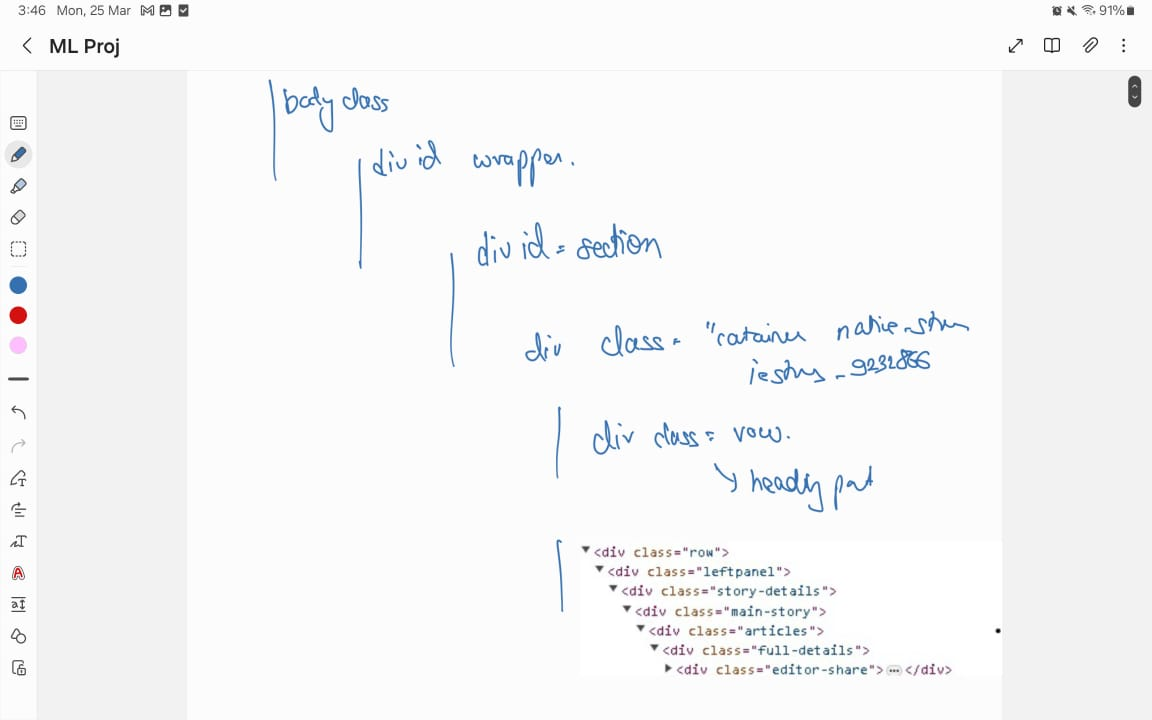

SENTIMENT ANALYSIS \\
**USEFUL MEASURE IS compound** \\
Using vaderSentiment \\
For compound: \\
Scores closer to -1 indicate highly negative sentiment. \\
Scores closer to 1 indicate highly positive sentiment. \\
Scores around 0 indicate neutral sentiment.\\

neg: It ranges from 0 to 1, where 0 means no negative sentiment detected and 1 means the entire text is negative. \\
pos: Similar to neg and neu, it ranges from 0 to 1.  \\
neu: where 0 means no neutral sentiment detected and 1 means the entire text is neutral \\

In [16]:
!pip install vaderSentiment
!pip install summa
!pip install transformers

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [17]:
!pip install yake
!pip install bs4
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/atharva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
import requests
from bs4 import BeautifulSoup
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')


def extract_articles_from_website(url):
    sentiment_words = []  # Initialize sentiment_words with an empty list
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        articles = soup.find_all('div', class_='native_story')
        if articles:
            for article in articles:
                title_element = article.find('h1', class_='native_story_title')
                title = title_element.text.strip() if title_element else "Title not found"
                url_element = article.find('input', class_='native_story_url')
                url = url_element['value'] if url_element else "URL not found"
                synopsis_element = article.find('h2', class_='synopsis')
                synopsis = synopsis_element.text.strip() if synopsis_element else "Synopsis not found"
                print("Title:", title)
                print("URL:", url)
                print("Synopsis:", synopsis)
                print("-" * 50)

        content_divs = soup.find_all('div', class_='container')
        for content_div in content_divs:
            content = content_div.find('div', class_='full-details')
            if content:
                content_text = content.get_text(strip=True)
                print("Content from second div:")
                print(content_text)
                print("-" * 50)

                sentiment_analyzer = SentimentIntensityAnalyzer()
                sentiment_scores = sentiment_analyzer.polarity_scores(content_text)
                print("Sentiment Analysis Results:")
                for key, value in sentiment_scores.items():
                    print(f"{key}: {value}")

                print("\nSentiment-related words:")
                if sentiment_scores['compound'] < -0.5:  # If compound score is highly negative
                    words = nltk.word_tokenize(content_text.lower())
                    stop_words = set(stopwords.words('english'))
                    sentiment_words = [word for word in words if word not in stop_words and word.isalpha() and len(word) > 2]
                    print(sentiment_words)
                else:
                    print("Compound score not highly negative.")

                break
        if not content:
            print("No articles found in the second div.")
    else:
        print("Failed to retrieve the page. Status code:", response.status_code)
    return content_text, sentiment_words


url = "https://indianexpress.com/article/cities/bangalore/electoral-bonds-raise-questions-about-rule-by-the-people-says-prashant-bhushan-9284970/#:~:text=%E2%80%9CThe%20limit%20was%20Rs%2075,the%20last%20six%20years%E2%80%A6.."
content_text, sentiment_words = extract_articles_from_website(url)


[nltk_data] Downloading package punkt to /home/atharva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/atharva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Title: Electoral bonds raise questions about ‘rule by the people’, says Prashant Bhushan
URL: https://indianexpress.com/article/cities/bangalore/electoral-bonds-raise-questions-about-rule-by-the-people-says-prashant-bhushan-9284970/
Synopsis: Transparency activist Anjali Bhardwaj says that changes in the Companies Act made it easy for shell companies to donate large sums to political parties.
--------------------------------------------------
Content from second div:
By:Express News ServiceBengaluru |April 22, 2024 21:48 IST3 min readPrashant Bhushan also raised the issue of Election Commission's limit on poll spending. (FB/Prashant Bhushan)Social activist Anjali Bhardwaj, senior Supreme Court lawyer Prashant Bhushan and other activists and civil society members addressed a gathering on the topic “Electoral bond-why is this the biggest scam” at the Gandhi Bhavan in Bengaluru.“… One of the biggest fountainheads of corruption in our country is political party funding…basically, political

In [20]:
print(content_text)

By:Express News ServiceBengaluru |April 22, 2024 21:48 IST3 min readPrashant Bhushan also raised the issue of Election Commission's limit on poll spending. (FB/Prashant Bhushan)Social activist Anjali Bhardwaj, senior Supreme Court lawyer Prashant Bhushan and other activists and civil society members addressed a gathering on the topic “Electoral bond-why is this the biggest scam” at the Gandhi Bhavan in Bengaluru.“… One of the biggest fountainheads of corruption in our country is political party funding…basically, political parties work behind a veil of secrecy…take money from big corporates, and instead of working for the public interest, they work in the interest of who they take money from,” said Bhardwaj, co-convener of the National Campaign for People’s Right to Information, at the event held on Saturday (April 20).Bhardwaj noted there were earlier two ways in which parties got funds, through the banking system or in cash. She noted that while the former was visible to the public a

In [21]:
from summa import summarizer

# Function to generate a summary of the content
def generate_summary(content_text):
    # Generate the summary
    summary = summarizer.summarize(content_text)
    return summary

# Generate the summary of the content
summary = generate_summary(content_text)

# Print the summary
print("Summary:")
print(summary)

Summary:
(FB/Prashant Bhushan)Social activist Anjali Bhardwaj, senior Supreme Court lawyer Prashant Bhushan and other activists and civil society members addressed a gathering on the topic “Electoral bond-why is this the biggest scam” at the Gandhi Bhavan in Bengaluru.“… One of the biggest fountainheads of corruption in our country is political party funding…basically, political parties work behind a veil of secrecy…take money from big corporates, and instead of working for the public interest, they work in the interest of who they take money from,” said Bhardwaj, co-convener of the National Campaign for People’s Right to Information, at the event held on Saturday (April 20).Bhardwaj noted there were earlier two ways in which parties got funds, through the banking system or in cash.
She noted that while the former was visible to the public and regulators, the latter was a “black hole”.Advertisement“They (theBJP) set upelectoral bondsas a system for political parties to take unlimited a

In [22]:
# Save the summary variable to a file
with open("summary.txt", "w") as file:
    file.write(summary)

In [23]:
# Save the summary variable to a file
with open("content.txt", "w") as file:
    file.write(content_text)

In [24]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
def preprocess_text(scraped_text):
    text = scraped_text.lower()
    text = re.sub(r"[^\w\s]", "", text)

    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]

    tokens = word_tokenize(text)

    return tokens

preprocessed_text = preprocess_text(content_text)
print(preprocessed_text)

['byexpress', 'news', 'servicebengaluru', 'april', '22', '2024', '2148', 'ist3', 'min', 'readprashant', 'bhushan', 'also', 'raised', 'the', 'issue', 'of', 'election', 'commissions', 'limit', 'on', 'poll', 'spending', 'fbprashant', 'bhushansocial', 'activist', 'anjali', 'bhardwaj', 'senior', 'supreme', 'court', 'lawyer', 'prashant', 'bhushan', 'and', 'other', 'activists', 'and', 'civil', 'society', 'members', 'addressed', 'a', 'gathering', 'on', 'the', 'topic', 'electoral', 'bondwhy', 'is', 'this', 'the', 'biggest', 'scam', 'at', 'the', 'gandhi', 'bhavan', 'in', 'bengaluru', 'one', 'of', 'the', 'biggest', 'fountainheads', 'of', 'corruption', 'in', 'our', 'country', 'is', 'political', 'party', 'fundingbasically', 'political', 'parties', 'work', 'behind', 'a', 'veil', 'of', 'secrecytake', 'money', 'from', 'big', 'corporates', 'and', 'instead', 'of', 'working', 'for', 'the', 'public', 'interest', 'they', 'work', 'in', 'the', 'interest', 'of', 'who', 'they', 'take', 'money', 'from', 'said',

Using HugginFace transformer BERT

In [25]:
!pip install ipywidgets 

Defaulting to user installation because normal site-packages is not writeable


In [26]:
! pip install ollama

Defaulting to user installation because normal site-packages is not writeable


In [27]:
import requests
from bs4 import BeautifulSoup
from transformers import BertTokenizer, BertForSequenceClassification
from torch.nn.functional import softmax
import torch
import ollama
def sentiment_analysis(content_text):
    # Load BERT model
    model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
    tokenizer = BertTokenizer.from_pretrained(model_name)
    model = BertForSequenceClassification.from_pretrained(model_name)

    inputs = tokenizer(content_text, return_tensors="pt", padding=True, truncation=True)

    # Perform sentiment analysis
    outputs = model(**inputs)
    probabilities = softmax(outputs.logits, dim=1).detach().numpy()[0]

    # Determine sentiment label
    sentiment_labels = ["very negative", "negative", "neutral", "positive", "very positive"]
    sentiment_probabilities = dict(zip(sentiment_labels, probabilities))
    return sentiment_probabilities

def extract_articles_from_website(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        articles = soup.find_all('div', class_='native_story')
        if articles:
            for article in articles:
                title_element = article.find('h1', class_='native_story_title')
                title = title_element.text.strip() if title_element else "Title not found"
                url_element = article.find('input', class_='native_story_url')
                url = url_element['value'] if url_element else "URL not found"
                synopsis_element = article.find('h2', class_='synopsis')
                synopsis = synopsis_element.text.strip() if synopsis_element else "Synopsis not found"
                print("Title:", title)
                print("URL:", url)
                print("Synopsis:", synopsis)
                print("-" * 50)
        content_divs = soup.find_all('div', class_='container')
        for content_div in content_divs:
            content = content_div.find('div', class_='full-details')
            if content:
                content_text = content.get_text(strip=True)
                print("Content from second div:")
                print(content_text)
                print("-" * 50)

                # Perform sentiment analysis
                sentiment = sentiment_analysis(content_text)
                print("Sentiment Analysis Results:")
                for label, probability in sentiment.items():
                    print(f"{label.capitalize()}: {probability:.2f}")

                # Store sentiment analysis results
                with open("sentiment_results.txt", "w") as file:
                    for label, probability in sentiment.items():
                        file.write(f"{label.capitalize()}: {probability:.2f}\n")

                break
        if not content:
            print("No articles found in the second div.")
    else:
        print("Failed to retrieve the page. Status code:", response.status_code)

url = "https://indianexpress.com/article/cities/bangalore/electoral-bonds-raise-questions-about-rule-by-the-people-says-prashant-bhushan-9284970/#:~:text=%E2%80%9CThe%20limit%20was%20Rs%2075,the%20last%20six%20years%E2%80%A6.."
extract_articles_from_website(url)

Title: Electoral bonds raise questions about ‘rule by the people’, says Prashant Bhushan
URL: https://indianexpress.com/article/cities/bangalore/electoral-bonds-raise-questions-about-rule-by-the-people-says-prashant-bhushan-9284970/
Synopsis: Transparency activist Anjali Bhardwaj says that changes in the Companies Act made it easy for shell companies to donate large sums to political parties.
--------------------------------------------------
Content from second div:
By:Express News ServiceBengaluru |April 22, 2024 21:48 IST3 min readPrashant Bhushan also raised the issue of Election Commission's limit on poll spending. (FB/Prashant Bhushan)Social activist Anjali Bhardwaj, senior Supreme Court lawyer Prashant Bhushan and other activists and civil society members addressed a gathering on the topic “Electoral bond-why is this the biggest scam” at the Gandhi Bhavan in Bengaluru.“… One of the biggest fountainheads of corruption in our country is political party funding…basically, political

In [28]:
pip install rake_nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [29]:
from rake_nltk import Rake


def extract_keywords(text):
    r = Rake()
    r.extract_keywords_from_text(text)
    return r.get_ranked_phrases()

# Example usage:
keywords = extract_keywords(summary)
print(keywords)

['“ black hole ”. advertisement “', 'senior supreme court lawyer prashant bhushan', 'political party funding … basically', 'april 20 ). bhardwaj noted', 'civil society members addressed', 'social activist anjali bhardwaj', 'topic “ electoral bond', 'take unlimited anonymous funds', 'tell anyone including regulators', 'secrecy … take money', 'political parties work behind', 'prashant bhushan said', 'set upelectoral bondsas', 'parties got funds', 'earlier two ways', 'donate large sums', 'bengaluru .“… one', 'biggest scam ”', ',” said bhardwaj', 'prashant bhushan', 'political parties', 'bhardwaj said', 'take money', 'electoral democracy', 'electoral bonds', 'biggest fountainheads', '“', 'shell companies', 'rbi warnings', 'people ’', 'national campaign', 'larger issue', 'gandhi bhavan', 'companies act', 'big corporates', 'event held', 'banking system', 'also made', 'public interest', 'noted', 'work', 'regulators', 'parties', 'money', 'money', ',”', 'system', 'public', 'interest', 'event', 

In [30]:
sentiment = sentiment_analysis(keywords)
for label, probability in sentiment.items():
                    print(f"{label.capitalize()}: {probability:.2f}")

Very negative: 0.05
Negative: 0.04
Neutral: 0.13
Positive: 0.32
Very positive: 0.46
